In [66]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('cleaned_properties_original.csv')
df.head()

,Unnamed: 0,locality,house_is,property_subtype,price,sale,rooms_number,area,kitchen_has,furnished,...,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state,region
0,0,4180,False,MIXED_USE_BUILDING,295000.0,Unknown,3.0,242.0,1.0,0.0,...,1.0,36.0,1.0,1000.0,1403.0,1403.0,0.0,0.0,GOOD,Wallonia
1,1,8730,True,VILLA,675000.0,Unknown,4.0,349.0,1.0,0.0,...,0.0,0.0,1.0,977.0,1526.0,1526.0,0.0,0.0,AS_NEW,Flanders
2,2,4020,False,APARTMENT_BLOCK,250000.0,Unknown,5.0,303.0,1.0,0.0,...,0.0,0.0,0.0,0.0,760.0,760.0,0.0,0.0,TO_RENOVATE,Wallonia
3,3,1200,True,HOUSE,545000.0,Unknown,4.0,235.0,1.0,1.0,...,0.0,0.0,0.0,0.0,63.0,63.0,0.0,0.0,JUST_RENOVATED,Brussels
4,4,1190,False,MIXED_USE_BUILDING,500000.0,Unknown,2.0,220.0,1.0,0.0,...,0.0,0.0,1.0,60.0,193.0,193.0,0.0,0.0,AS_NEW,Brussels


In [68]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
df.shape

(51305, 20)

In [70]:
df.columns

Index(['locality', 'house_is', 'property_subtype', 'price', 'sale',
       'rooms_number', 'area', 'kitchen_has', 'furnished', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'land_surface',
       'land_plot_surface', 'facades_number', 'swimming_pool_has',
       'building_state', 'region'],
      dtype='object')

In [71]:
df.dtypes

locality              object
house_is              object
property_subtype      object
price                float64
sale                  object
rooms_number         float64
area                 float64
kitchen_has          float64
furnished            float64
open_fire            float64
terrace              float64
terrace_area         float64
garden               float64
garden_area          float64
land_surface         float64
land_plot_surface    float64
facades_number       float64
swimming_pool_has    float64
building_state        object
region                object
dtype: object

In [72]:
df.describe()

,price,rooms_number,area,kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has
count,5.130500e+04,51095.000000,4.772700e+04,46931.000000,45649.000000,45951.000000,38339.000000,28507.000000,43920.000000,31121.000000,3.877300e+04,3.437400e+04,40098.000000,45327.000000
mean,4.339413e+05,3.405754,2.617474e+05,0.749462,0.125326,0.062240,0.576906,14.812432,2.796972,224.754956,6.483729e+02,7.654145e+06,1.629009,0.043727
std,5.571921e+05,3.008150,3.739083e+07,0.433328,0.331092,0.241594,0.494057,38.767899,22.802135,1946.841577,8.019572e+03,2.307370e+08,1.557000,0.204489
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.900000e+05,2.000000,9.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.800000e+01,0.000000,0.000000
50%,2.950000e+05,3.000000,1.550000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,2.520000e+02,2.000000,0.000000
75%,4.650000e+05,4.000000,2.550000e+02,1.000000,0.000000,0.000000,1.000000,19.000000,1.000000,0.000000,3.000000e+02,9.600000e+02,3.000000,0.000000
max,2.345679e+07,204.000000,6.264000e+09,1.000000,1.000000,1.000000,1.000000,3749.000000,3749.000000,94000.000000,1.379000e+06,1.350000e+10,10.000000,1.000000


# NULL CHECK

In [73]:
df.isna().sum()

locality                 0
house_is                 0
property_subtype         0
price                    0
sale                     0
rooms_number           210
area                  3578
kitchen_has           4374
furnished             5656
open_fire             5354
terrace              12966
terrace_area         22798
garden                7385
garden_area          20184
land_surface         12532
land_plot_surface    16931
facades_number       11207
swimming_pool_has     5978
building_state           0
region                   0
dtype: int64

In [74]:
# plt.figure(figsize=(20,10))
# sns.heatmap(df.isna(),annot=True)
# plt.show()

# Preprocessing -EDA

In [75]:
num_cols = df.select_dtypes(include=np.number)
cat_cols = df.select_dtypes(exclude=np.number)

### Locality

In [76]:
df['locality'].value_counts()

unknown    23377
8300        1166
1180         940
1000         729
1050         684
           ...  
7623           1
4681           1
5330           1
5541           1
4250           1
Name: locality, Length: 921, dtype: int64

In [77]:
len(np.unique(df['locality']))

921

In [78]:
df[df['locality']=='unknown']

,locality,house_is,property_subtype,price,sale,rooms_number,area,kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state,region
17143,unknown,True,House,495000.0,Unknown,3.0,2442.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,Not specified,unknown
17188,unknown,True,House,175000.0,Unknown,2.0,682.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,Not specified,unknown
17196,unknown,unknown,Flat,290000.0,Unknown,3.0,1382.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,Not specified,unknown
17201,unknown,True,House,1250000.0,Unknown,12.0,7002.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,Not specified,unknown
17202,unknown,unknown,Flat,228000.0,Unknown,2.0,732.0,0.0,0.0,1.0,0.0,NaN,1.0,NaN,0.0,NaN,NaN,0.0,Not specified,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51300,unknown,False,PENTHOUSE,339000.0,residential_sale,2.0,115.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,Not specified,unknown
51301,unknown,False,PENTHOUSE,649000.0,residential_sale,2.0,98.0,1.0,NaN,0.0,NaN,NaN,28.0,NaN,0.0,NaN,NaN,0.0,AS_NEW,unknown
51302,unknown,False,APARTMENT,25000.0,annuity_monthly_amount,3.0,142.0,1.0,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,NaN,NaN,AS_NEW,unknown
51303,unknown,False,APARTMENT,99000.0,residential_sale,3.0,210.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,Not specified,unknown


In [79]:
def convert_locatlity(x):
    try:
        x = int(x)
        return x
    except:
        if x == 'unknown':
            return np.nan

In [80]:
df['locality'] = df['locality'].apply(convert_locatlity)

In [81]:
df['locality'].dtype

dtype('float64')

In [82]:
df['locality'].fillna(method='bfill',inplace=True)

In [83]:
def num_plot(x,c='g'):
    plt.figure(figsize=(16,8))
    sns.distplot(df[x],color=c)
    plt.show()
    print(10*'----',x,10*'----')
    print('Min:',df[x].min())
    print('Max:',df[x].max())
    print('Mean:',df[x].mean())
    print()

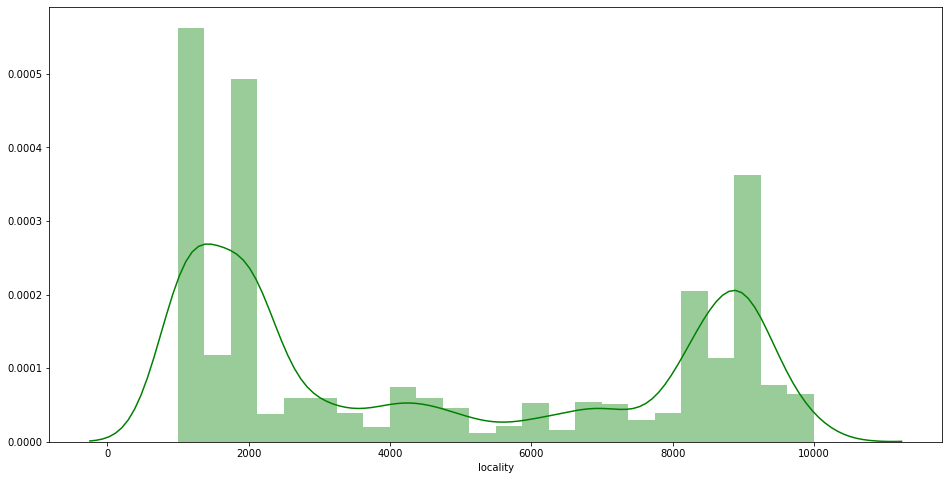

---------------------------------------- locality ----------------------------------------
Min: 1000.0
Max: 9992.0
Mean: 4660.4502572066385



In [84]:
num_plot('locality')

In [85]:
df['house_is'].value_counts()

True       24511
False      22137
unknown     4657
Name: house_is, dtype: int64

In [86]:
def cat_plot(x):
    plt.figure(figsize=(16,8))
    sns.countplot(df[x])
    plt.show()

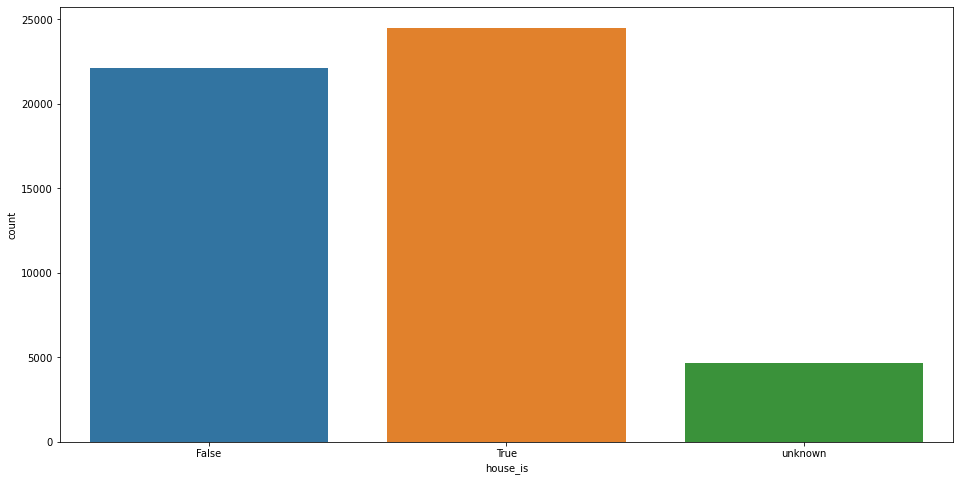

In [87]:
cat_plot('house_is')

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
house_lab = LabelEncoder()
df['house_is'] = house_lab.fit_transform(df['house_is'])

In [90]:
df['property_subtype'].value_counts()[:30]

HOUSE                   15158
APARTMENT               10047
apartment                3624
house                    3562
VILLA                    3247
APARTMENT_BLOCK          1909
MIXED_USE_BUILDING       1708
Apartment                1279
DUPLEX                    900
PENTHOUSE                 865
EXCEPTIONAL_PROPERTY      670
GROUND_FLOOR              625
MANSION                   593
villa                     473
FLAT_STUDIO               461
House                     317
TOWN_HOUSE                304
duplex                    296
Loft / Attic              256
ground-floor              254
COUNTRY_COTTAGE           253
Penthouse                 237
penthouse                 209
Villa                     187
flat-studio               184
Wohnung                   183
LOFT                      177
Flat                      174
BUNGALOW                  172
SERVICE_FLAT              166
Name: property_subtype, dtype: int64

In [91]:
def convert_house_type(x):
    if x.isdigit():
        return 'OTHER_PROPERTY'
    
    elif x.endswith('sqft'):
        x = x[:-4]
        return 'OTHER_PROPERTY'
    
    elif x=='other-property':
        return 'OTHER_PROPERTY'
    
    elif x=='Other':
        return 'OTHER_PROPERTY'
    
    elif x.lower() =='apartment-block' or x.lower() =='apartment_block' or x.lower() =='apartamento' or x.lower()=='appartamento' or x.lower() =='apartment' or x.lower() =='appartamento duplex' or x.lower() =='appartement':
        return 'apartment'.title()
    
    elif x.lower() in ['loft','loft / attic','loft / dachgeschoss','loft / mansarde','loft / zolder','loft / ático','loft / attic','loft / dachgeschoss',]:
        return 'LOFT'
   
    elif x.lower() in ['duplex','duplex apartment', 'dúplex']:
        return 'Duplex'
    
    elif x.lower() in ['maison', 'maison détachée','maisonette', 'maisonette / duplex','mansion','manor-house', 'manor_house']:
        return 'Maison'
    
    elif x.lower() in ['triplex', 'triplexwohnung']:
        return 'Triplex'
    
    elif x.lower() in ['flat','flat-studio', 'flat_studio','service-flat', 'service_flat']:
        return 'Flat'
    
    elif x.lower() in ['town-house','town_house','house', 'huis']:
        return 'House'
    
    elif x.lower() in ['investering / woon- en werkruimte', 'investissement','investment / residential investment', 'investment property']:
        return 'Investment Property'
    
    elif x in ['PENTHOUSE','Penthouse','penthouse']:
        return 'PENTHOUSE'
    
    elif x in ['HOUSE','House']:
        return 'House'
    
    elif x in ['Villa ','villa','VILLA']:
        return 'Villa'
    
    elif x in ['Attico','Gewerbe','Dakwoning','Business','Erdgeschoss','Hotel','Altbauwohnung','Bungalow','Landhuis','Ander(e)','Sonstige','Ground Floor Apartment','Autre','castle','Immeuble spécial','Detached House','Etagenwohnung','Finca','Historische pand','Établissement historique','kot','chalet','KOT','Special Property','Vrijstaande woning','Newbuild project','Historic Estate','CHALET','exceptional-property']:
        return 'OTHER_PROPERTY'
    
    elif x in ['farmhouse','FARMHOUSE']:
        return 'FARMHOUSE'
    
    elif x in ['COUNTRY_COTTAGE','country-cottage']:
        return 'COUNTRY_COTTAGE'
    elif x in ['ground-floor','GROUND_FLOOR']:
        return 'GROUND_FLOOR'
    
    elif x in ['mixed-use-building','MIXED_USE_BUILDING']:
        return 'MIXED_USE_BUILDING'
    else:
        return x
    

In [92]:
df['property_subtype'] = df['property_subtype'].apply(convert_house_type)

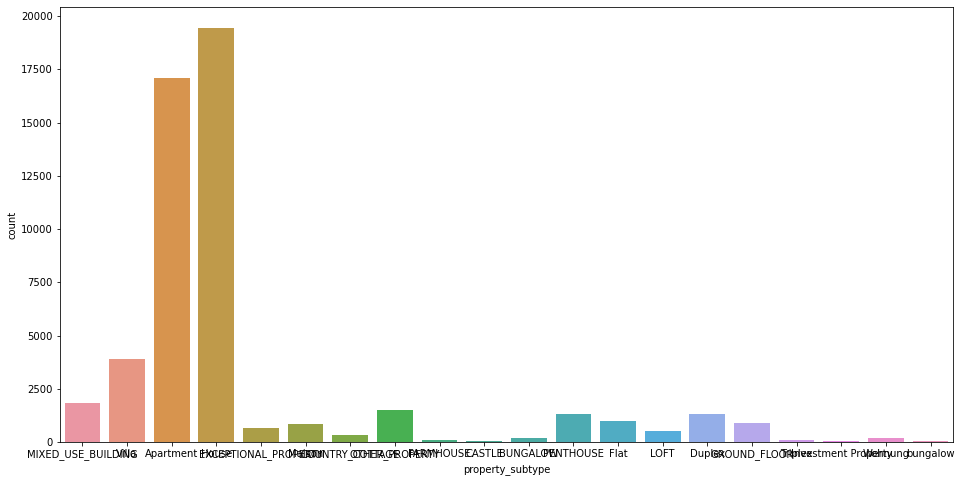

In [93]:
cat_plot('property_subtype')

In [94]:
prop_lb = LabelEncoder()
df['property_subtype'] = prop_lb.fit_transform(df['property_subtype'])

# Sale

In [95]:
df['sale'].value_counts()

Unknown                                   27823
unknown                                    9492
residential_sale                           9395
Apartment                                  2929
first_session_with_reserve_price            620
Wohnung                                     262
Public Sale                                 172
Huis                                        142
House                                       129
Maison                                      108
Apartamento                                  77
annuity_monthly_amount                       73
Appartement                                  57
Notary Sale                                  13
Appartamento                                  8
final_public_sale                             2
last_session_reached_price_min_overbid        2
annuity_lump_sum                              1
Name: sale, dtype: int64

In [96]:
np.unique(df['sale'])

array(['Apartamento', 'Apartment', 'Appartamento', 'Appartement', 'House',
       'Huis', 'Maison', 'Notary Sale', 'Public Sale', 'Unknown',
       'Wohnung', 'annuity_lump_sum', 'annuity_monthly_amount',
       'final_public_sale', 'first_session_with_reserve_price',
       'last_session_reached_price_min_overbid', 'residential_sale',
       'unknown'], dtype=object)

In [97]:
len(np.unique(df['sale'].str.lower()))

17

In [98]:
def convert_sale(x):
    x = x.lower()
    if x in ['apartamento', 'apartment', 'appartamento', 'appartement','appartamento','appartement']:
        return 'Appartement'
    elif x =='unknown':
        return 'Unknown'
    elif x in ['final_public_sale','public sale']:
        return 'public_sale'
    elif x in ['annuity_monthly_amount','notary sale','last_session_reached_price_min_overbid','annuity_lump_sum']:
        return 'Other sale'
    else:
        return x

In [99]:
df['sale'] = df['sale'].apply(convert_sale)

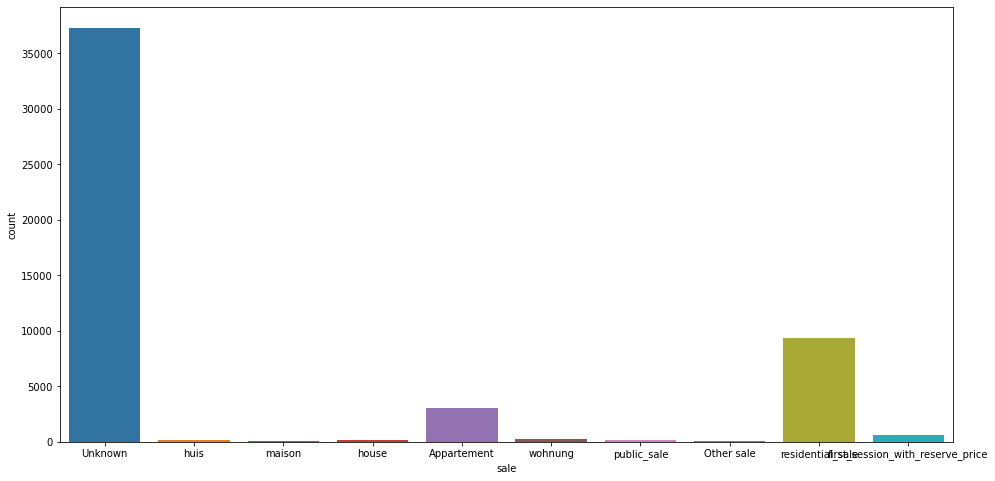

In [100]:
cat_plot('sale')

In [101]:
sale_lb = LabelEncoder()
df['sale'] = sale_lb.fit_transform(df['sale'])

In [102]:
sale_lb.classes_

array(['Appartement', 'Other sale', 'Unknown',
       'first_session_with_reserve_price', 'house', 'huis', 'maison',
       'public_sale', 'residential_sale', 'wohnung'], dtype=object)

In [103]:
df.dtypes

locality             float64
house_is               int64
property_subtype       int64
price                float64
sale                   int64
rooms_number         float64
area                 float64
kitchen_has          float64
furnished            float64
open_fire            float64
terrace              float64
terrace_area         float64
garden               float64
garden_area          float64
land_surface         float64
land_plot_surface    float64
facades_number       float64
swimming_pool_has    float64
building_state        object
region                object
dtype: object

# Building state

In [104]:
df['building_state'].value_counts()

Not specified     26186
AS_NEW            11031
GOOD               7654
TO_BE_DONE_UP      2049
TO_RENOVATE        1777
JUST_RENOVATED     1617
old                 475
New                 393
TO_RESTORE          123
Name: building_state, dtype: int64

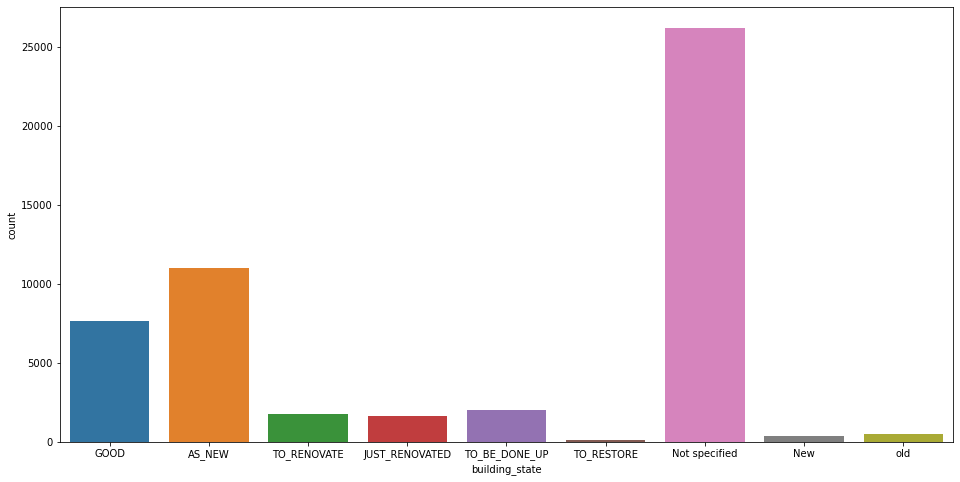

In [105]:
cat_plot('building_state')

In [106]:
bst_lb = LabelEncoder()
df['building_state'] = bst_lb.fit_transform(df['building_state'])

In [107]:
bst_lb.classes_

array(['AS_NEW', 'GOOD', 'JUST_RENOVATED', 'New', 'Not specified',
       'TO_BE_DONE_UP', 'TO_RENOVATE', 'TO_RESTORE', 'old'], dtype=object)

# Region

In [108]:
df['region'].value_counts()

unknown     23377
Flanders    14461
Wallonia     8438
Brussels     5029
Name: region, dtype: int64

In [109]:
reg_lb = LabelEncoder()
df['region'] = reg_lb.fit_transform(df['region'])

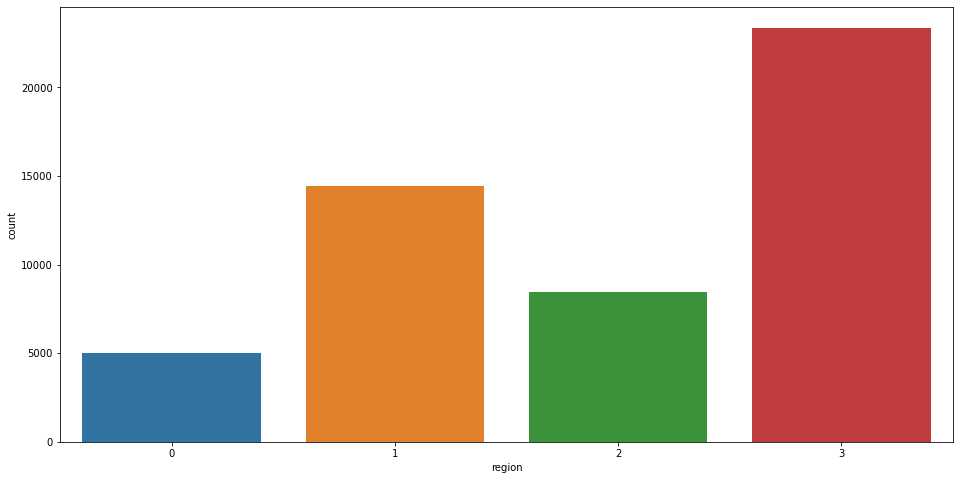

In [110]:
cat_plot('region')

In [111]:
df.dtypes

locality             float64
house_is               int64
property_subtype       int64
price                float64
sale                   int64
rooms_number         float64
area                 float64
kitchen_has          float64
furnished            float64
open_fire            float64
terrace              float64
terrace_area         float64
garden               float64
garden_area          float64
land_surface         float64
land_plot_surface    float64
facades_number       float64
swimming_pool_has    float64
building_state         int64
region                 int64
dtype: object

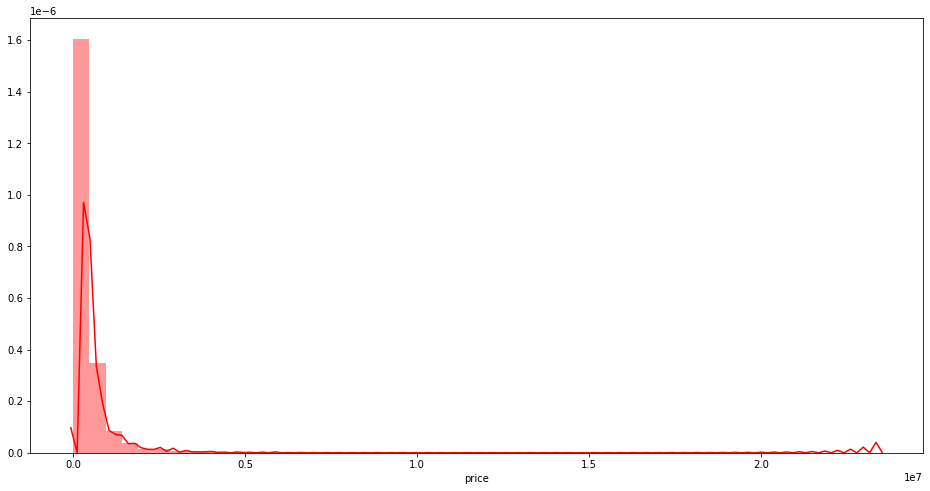

---------------------------------------- price ----------------------------------------
Min: 0.0
Max: 23456789.0
Mean: 433941.2727291687



In [112]:
num_plot('price',c='r')

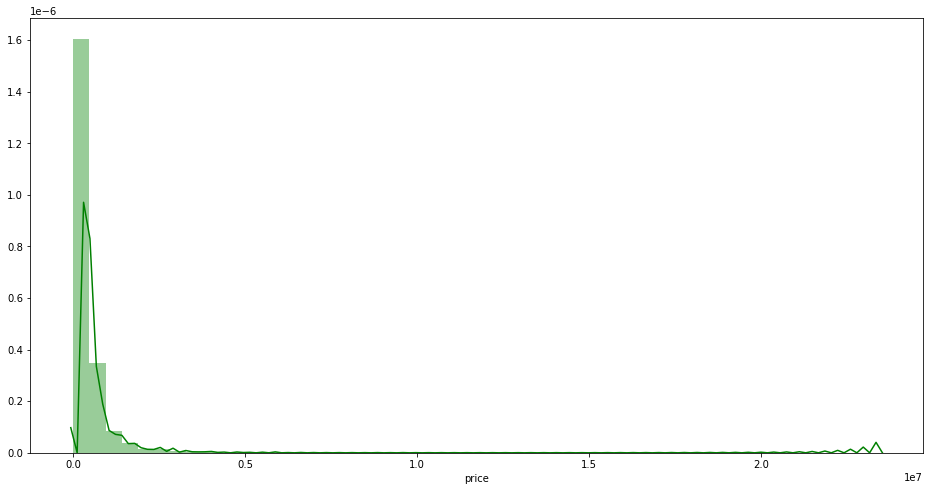

---------------------------------------- price ----------------------------------------
Min: 0.0
Max: 23456789.0
Mean: 433941.2727291687



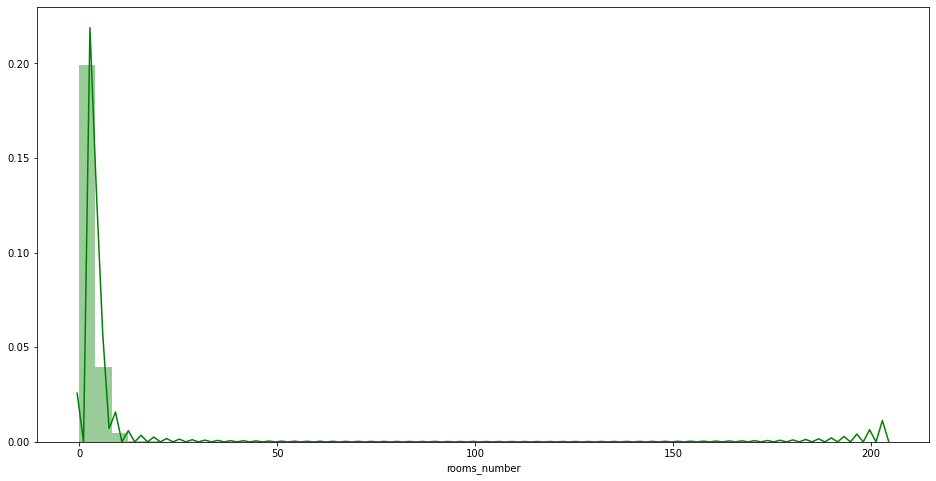

---------------------------------------- rooms_number ----------------------------------------
Min: 0.0
Max: 204.0
Mean: 3.4057539876700265



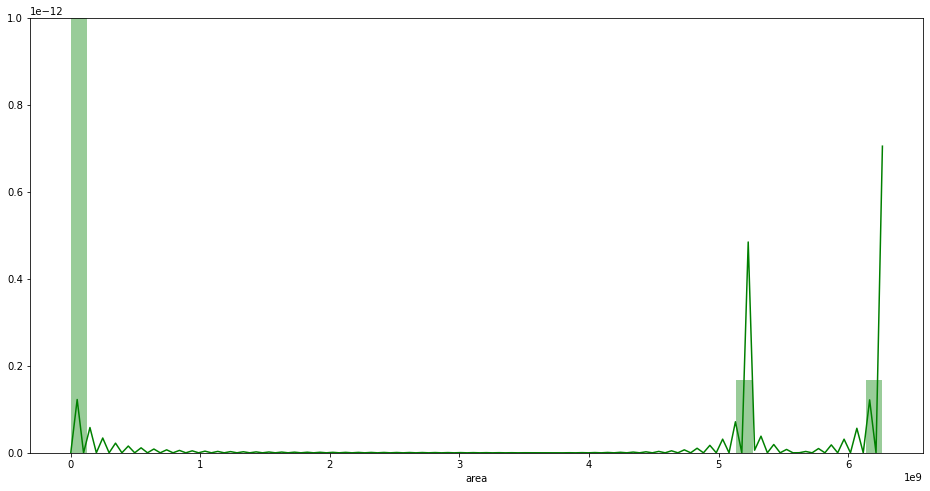

---------------------------------------- area ----------------------------------------
Min: 0.0
Max: 6264000000.0
Mean: 261747.42583527585



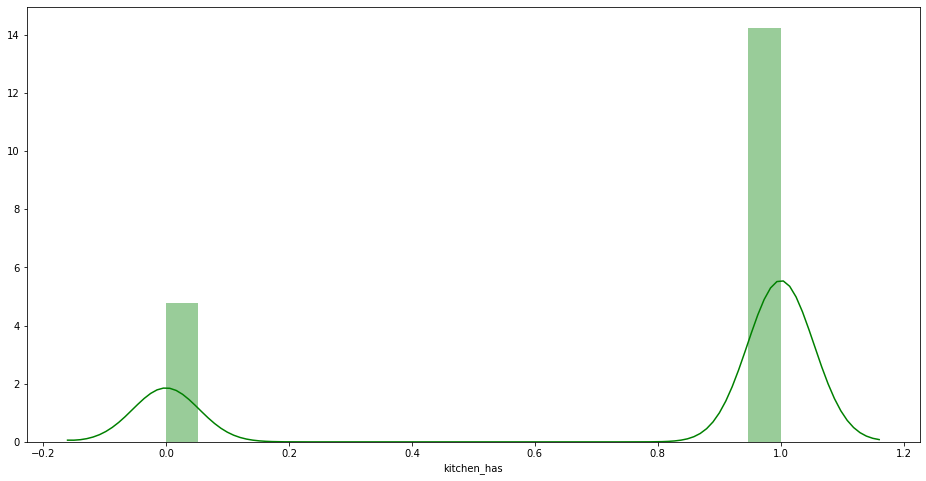

---------------------------------------- kitchen_has ----------------------------------------
Min: 0.0
Max: 1.0
Mean: 0.7494619760925614



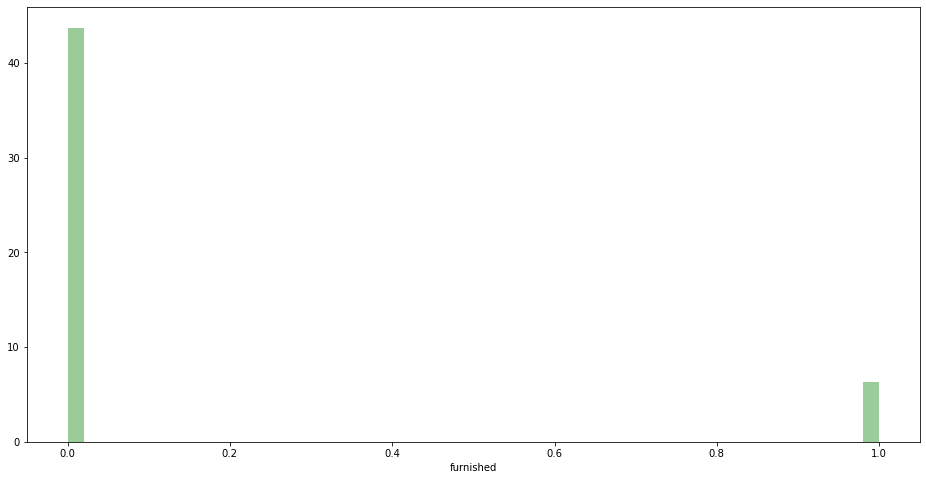

---------------------------------------- furnished ----------------------------------------
Min: 0.0
Max: 1.0
Mean: 0.125325855988083



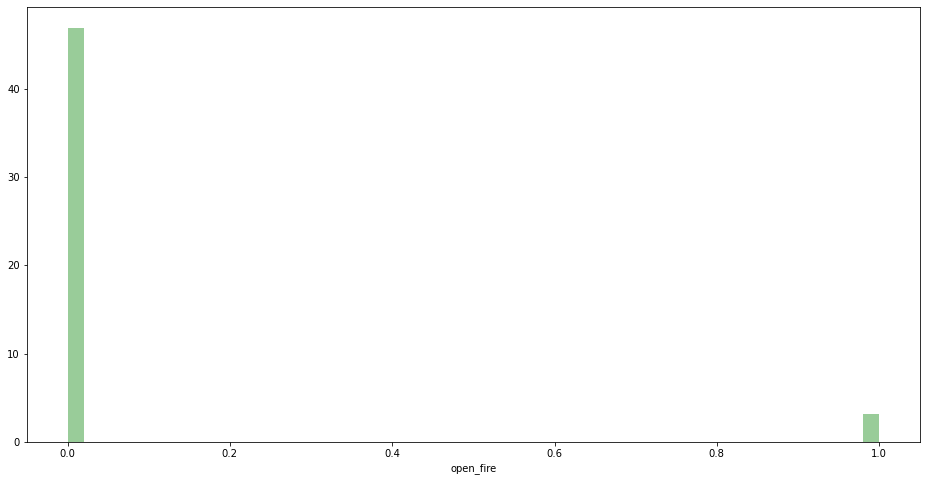

---------------------------------------- open_fire ----------------------------------------
Min: 0.0
Max: 1.0
Mean: 0.0622402124001654



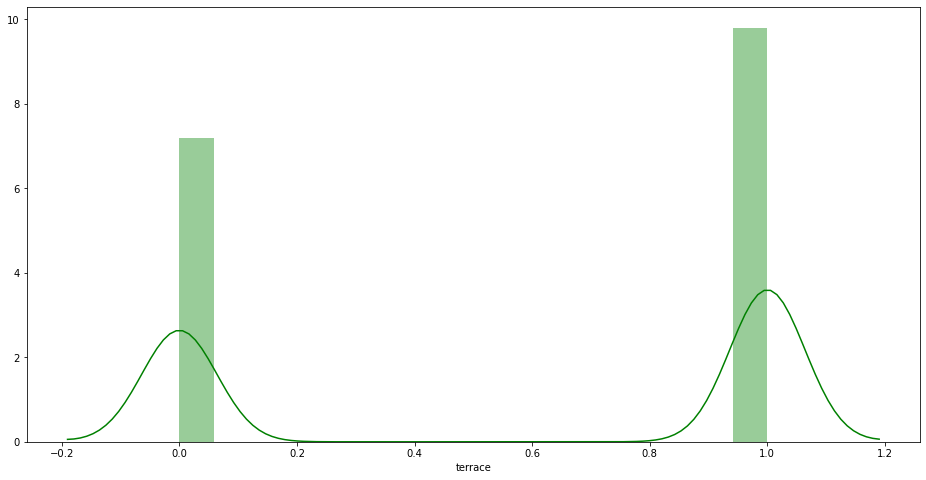

---------------------------------------- terrace ----------------------------------------
Min: 0.0
Max: 1.0
Mean: 0.5769060225879653



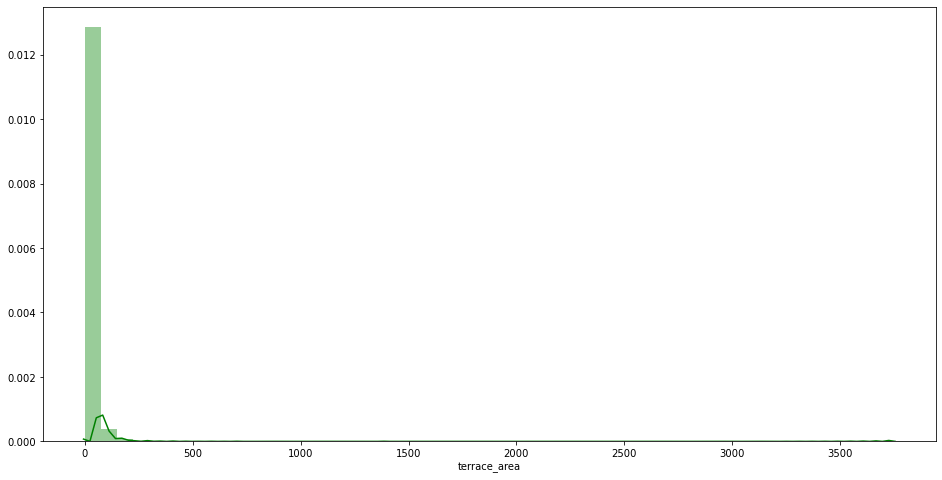

---------------------------------------- terrace_area ----------------------------------------
Min: 0.0
Max: 3749.0
Mean: 14.812432034237204



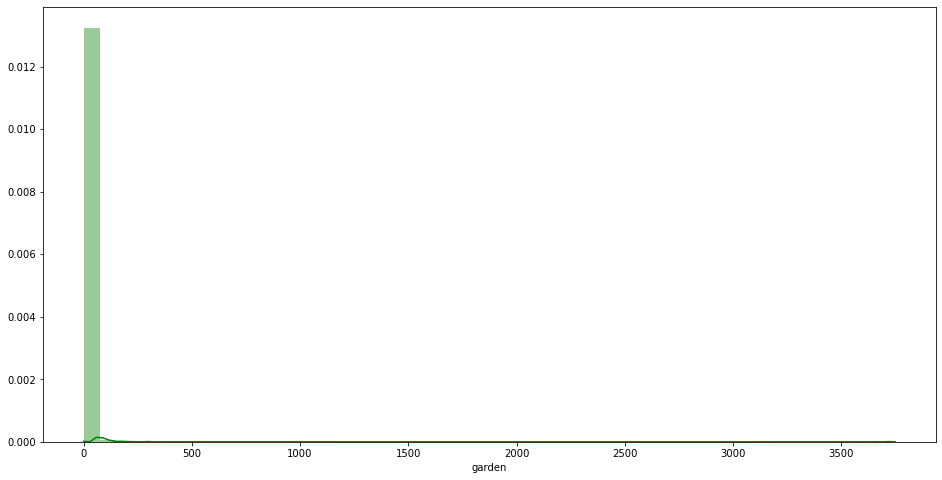

---------------------------------------- garden ----------------------------------------
Min: 0.0
Max: 3749.0
Mean: 2.796971766848816



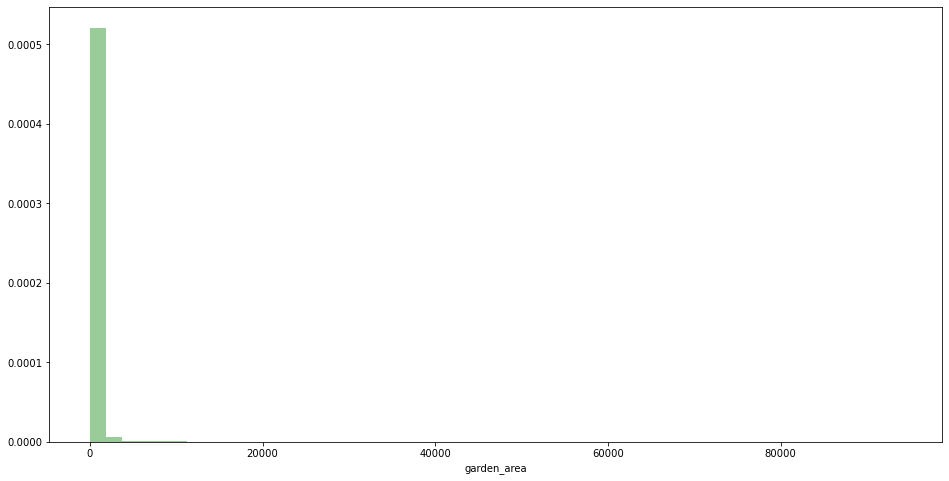

---------------------------------------- garden_area ----------------------------------------
Min: 0.0
Max: 94000.0
Mean: 224.75495646026798



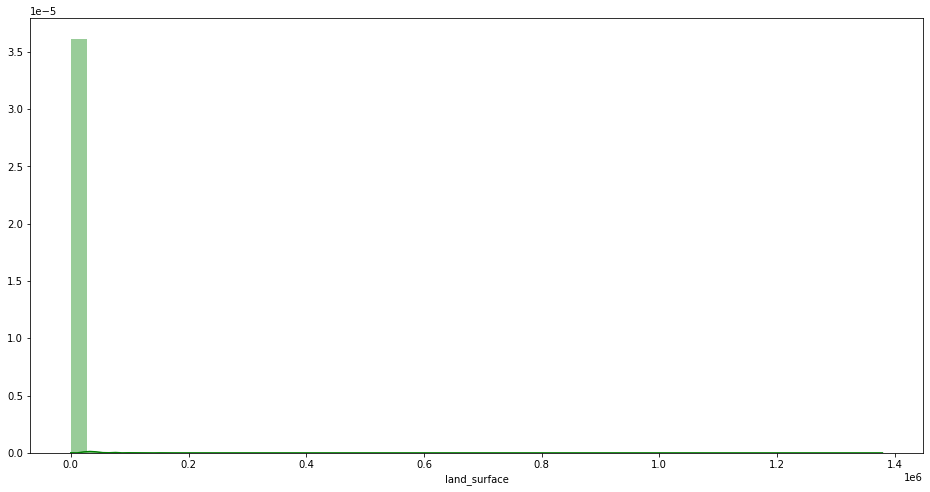

---------------------------------------- land_surface ----------------------------------------
Min: 0.0
Max: 1379000.0
Mean: 648.3728625589972



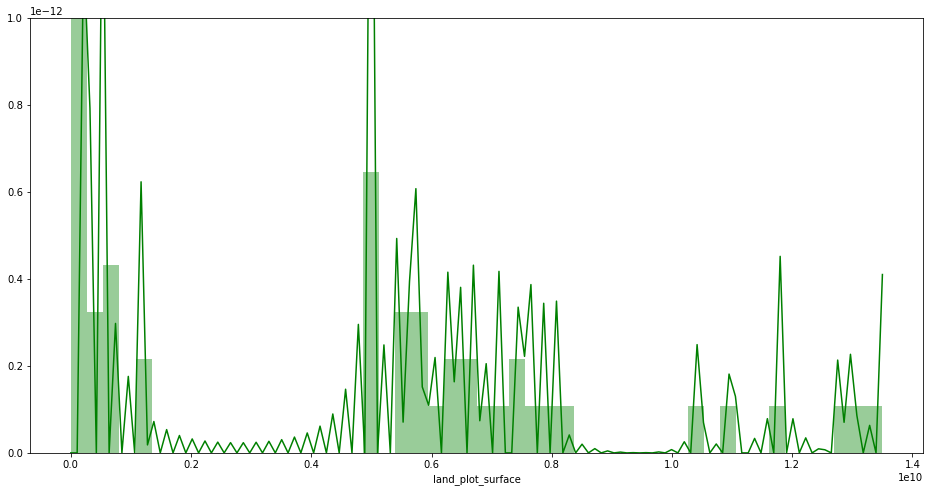

---------------------------------------- land_plot_surface ----------------------------------------
Min: 0.0
Max: 13500000000.0
Mean: 7654144.85759993



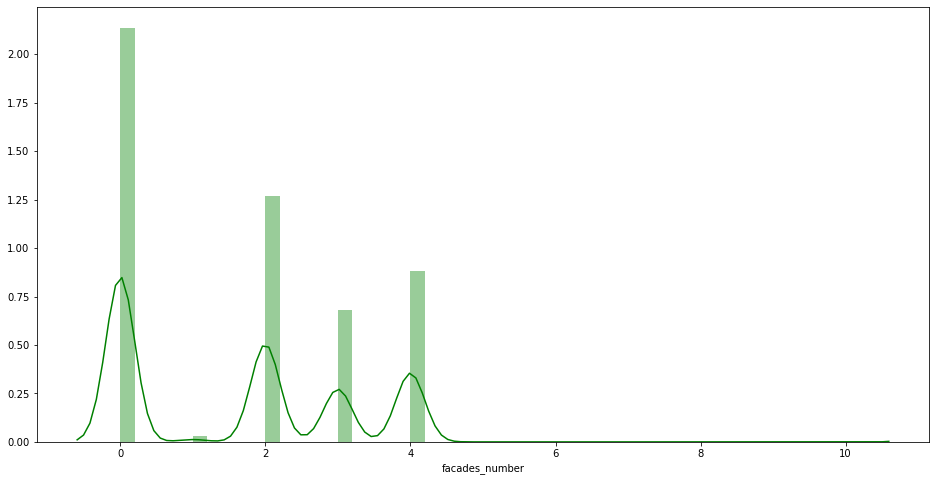

---------------------------------------- facades_number ----------------------------------------
Min: 0.0
Max: 10.0
Mean: 1.629008928126091



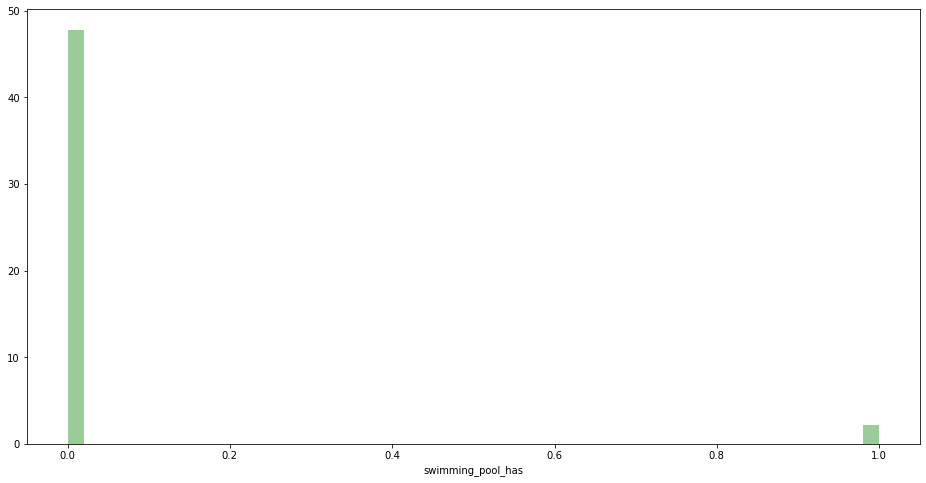

---------------------------------------- swimming_pool_has ----------------------------------------
Min: 0.0
Max: 1.0
Mean: 0.04372669711209654



In [113]:
for x in num_cols.columns:
    num_plot(x)

In [114]:
for col in df.columns:
    df[col].fillna(value=df[col].mean())
print('done')

done


## Filling values

In [115]:
for col in df.columns:
    df[col].fillna(value=df[col].mean(),inplace=True)

## Identifieng Multicollinearity 

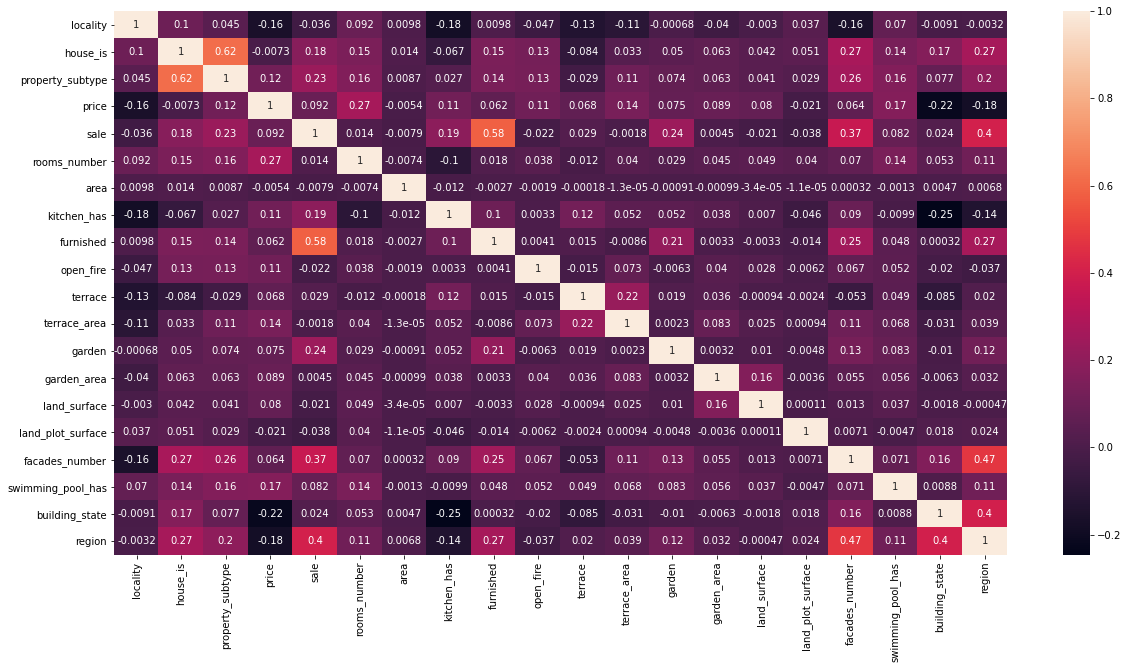

In [116]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [117]:
df_corr = df.corr()
df_corr['price'].sort_values(ascending=False)

price                1.000000
rooms_number         0.265052
swimming_pool_has    0.170266
terrace_area         0.136240
property_subtype     0.117814
kitchen_has          0.114311
open_fire            0.109261
sale                 0.092231
garden_area          0.088761
land_surface         0.079558
garden               0.075079
terrace              0.067979
facades_number       0.063782
furnished            0.061827
area                -0.005350
house_is            -0.007305
land_plot_surface   -0.021050
locality            -0.162040
region              -0.181015
building_state      -0.221144
Name: price, dtype: float64

In [118]:
# property_subtype --- house_is
# furnished --- sale --- facades_numbers -- locality --- 
# garden --- furnished
# terrace --- terrace area
# faced_numbers --region --furnished --- sale ---house_is

['price','rooms_number','swimming_pool_has','terrace_area','property_subtype','kitchen_has','open_fire','sale','garden_area','land_surface',]

['price',
 'rooms_number',
 'swimming_pool_has',
 'terrace_area',
 'property_subtype',
 'kitchen_has',
 'open_fire',
 'sale',
 'garden_area',
 'land_surface']

In [119]:
df.columns

Index(['locality', 'house_is', 'property_subtype', 'price', 'sale',
       'rooms_number', 'area', 'kitchen_has', 'furnished', 'open_fire',
       'terrace', 'terrace_area', 'garden', 'garden_area', 'land_surface',
       'land_plot_surface', 'facades_number', 'swimming_pool_has',
       'building_state', 'region'],
      dtype='object')

In [120]:
ft_df = df[['price','rooms_number','swimming_pool_has','terrace_area','open_fire','sale','garden_area']]

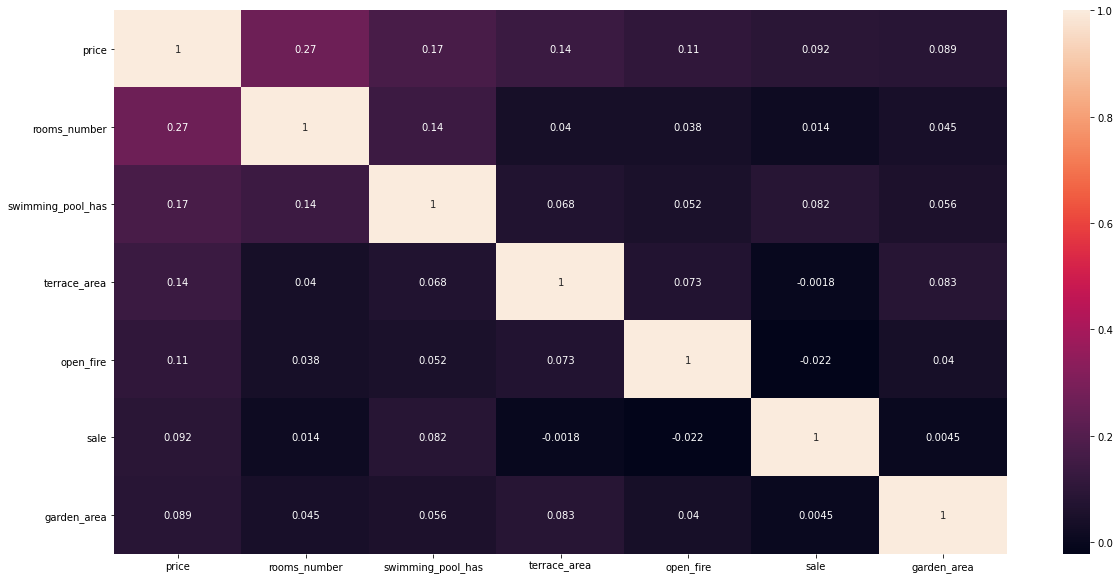

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(ft_df.corr(),annot=True)
plt.show()

In [122]:
ft_corr = ft_df.corr()
ft_corr['price'].sort_values(ascending=False)

price                1.000000
rooms_number         0.265052
swimming_pool_has    0.170266
terrace_area         0.136240
open_fire            0.109261
sale                 0.092231
garden_area          0.088761
Name: price, dtype: float64

In [123]:
df.isna().sum()

locality             0
house_is             0
property_subtype     0
price                0
sale                 0
rooms_number         0
area                 0
kitchen_has          0
furnished            0
open_fire            0
terrace              0
terrace_area         0
garden               0
garden_area          0
land_surface         0
land_plot_surface    0
facades_number       0
swimming_pool_has    0
building_state       0
region               0
dtype: int64

# Model Building

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split

In [125]:
x = df.drop('price',axis=1).values
y = df['price'].values

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [134]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(x_test)

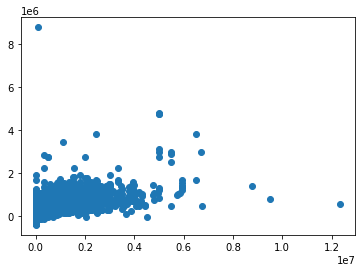

In [138]:
plt.scatter(y_test,y_pred)

In [139]:
mse = mean_squared_error(y_pred,y_test)
mse

211064357444.1669

In [140]:
np.sqrt(mse)

459417.410906647

In [141]:
from sklearn.metrics import r2_score

In [142]:
r2_score(y_pred,y_test)

-1.5889815845473185

# Best features

In [149]:
xt = ft_df.drop('price',axis=1).values
yt = ft_df['price'].values

In [150]:
xt_train,xt_test,yt_train,yt_test = train_test_split(xt,yt,test_size=0.3,random_state=90)

In [151]:
ft_lr = LinearRegression()
ft_lr.fit(xt_train,yt_train)
yt_pred = ft_lr.predict(xt_test)


In [152]:
mse = mean_squared_error(yt_pred,y_test)
mse

327596977927.2592

In [153]:
np.sqrt(mse)

572360.8808498876

In [154]:
r2_score(yt_pred,yt_test)

-5.8017213318394845